project done by mauzum shamil on predicting multiple skin disease with deeplearning - EfficientNetBo

In [2]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from keras.utils import to_categorical, plot_model
import os

In [3]:
label_encoder = LabelEncoder()
label_encoder.fit(['cloudy','rainy','shine'])

LabelEncoder()

In [5]:
data = []
result = []
paths = []

for weather_folder in ['cloudy','rainy','shine']:
    class_index = label_encoder.transform([weather_folder])[0]
    class_result = to_categorical(class_index,num_classes=3)

    for r,d,f in os.walk(os.path.join(r"C:\Users\dell\Desktop\weather dataset",weather_folder)):
        for file in f:
            if file.lower().endswith(('.jpg','.jpeg')):
                paths.append(os.path.join(r,file))

    for path in paths:
        img = Image.open(path)
        img = img.resize((128,128))
        img = np.array(img)
        if img.shape==(128,128,3):
            data.append(np.array(img))
            result.append(class_result)

In [6]:
data = np.array(data)
data.shape

(1280, 128, 128, 3)

In [8]:
result = np.array(result)
result.shape
result = result.reshape(1280,-1)
result.shape

(1280, 3)

# visualization

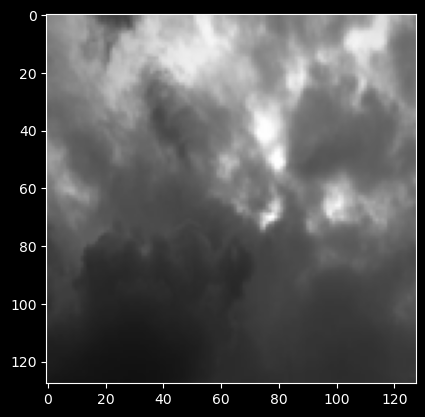

In [9]:
plt.imshow(data[0])

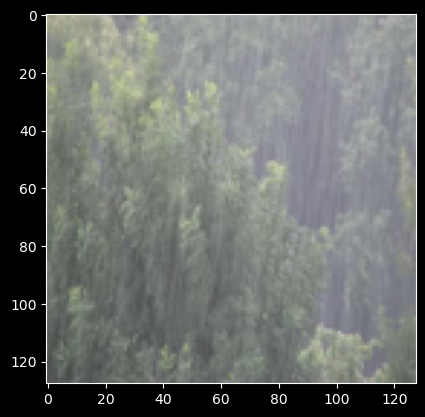

In [11]:
plt.imshow(data[1000])

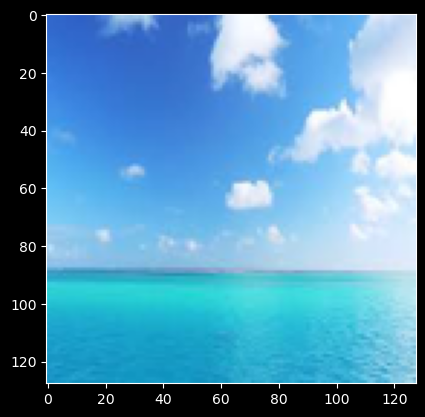

In [14]:
plt.imshow(data[1220])

In [16]:
data = np.random.permutation(data)



In [18]:
result = np.random.permutation(result)

In [19]:
data.shape

(1280, 128, 128, 3)

In [20]:
result.shape

(1280, 3)

# data splitting

In [21]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.2,shuffle=True,random_state=42)

# model building(effcientnet model)

In [22]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [23]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128,128, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [24]:
for layer in base_model.layers:
    layer.trainable = False

In [25]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

# model configuration

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

# model training

In [29]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - accuracy: 0.4438 - loss: 1.0847 - val_accuracy: 0.4375 - val_loss: 1.1436
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.5519 - loss: 0.9324 - val_accuracy: 0.4414 - val_loss: 1.1586
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.5830 - loss: 0.8544 - val_accuracy: 0.4023 - val_loss: 1.1921
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - accuracy: 0.6390 - loss: 0.7752 - val_accuracy: 0.4297 - val_loss: 1.2662
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.6049 - loss: 0.7766 - val_accuracy: 0.3945 - val_loss: 1.3239
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 248ms/step - accuracy: 0.6092 - loss: 0.7719 - val_accuracy: 0.4023 - val_loss: 1.3472
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 0.6600 - loss: 0.7305 - val_accuracy: 0.3906 - val_loss: 1.3780
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - accuracy: 0.6585 - loss: 0.7324 - val_accuracy: 0

In [30]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.3847 - loss: 1.4964
Test accuracy: 0.34765625


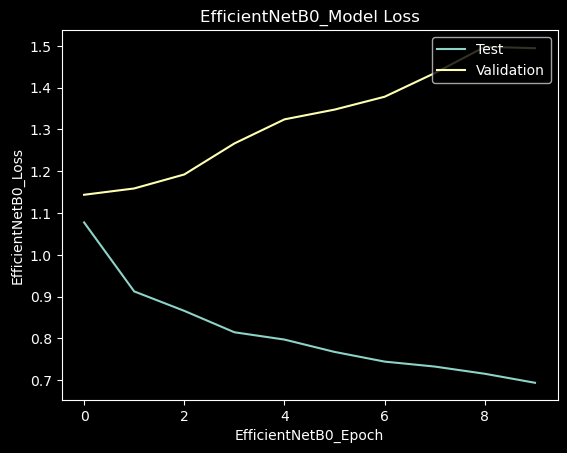

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('EfficientNetB0_Model Loss')
plt.ylabel('EfficientNetB0_Loss')
plt.xlabel('EfficientNetB0_Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

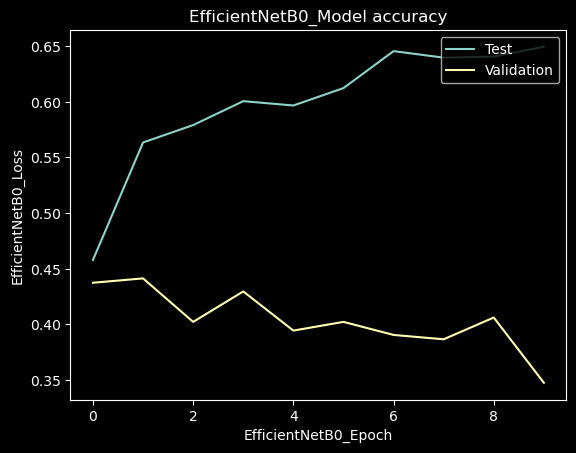

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('EfficientNetB0_Model accuracy')
plt.ylabel('EfficientNetB0_Loss')
plt.xlabel('EfficientNetB0_Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [34]:
def names(number):
    if number==0:
        return 'cloudy'
    if number==1:
        return 'rainy'
    else:
        return 'shiny'

41.800886392593384% Confidence This Is cloudy


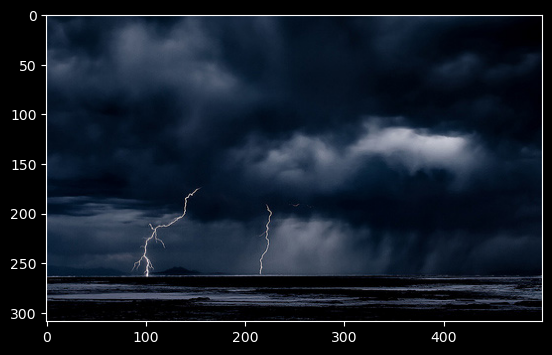

In [36]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\weather dataset\cloudy\cloudy62.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

shiny


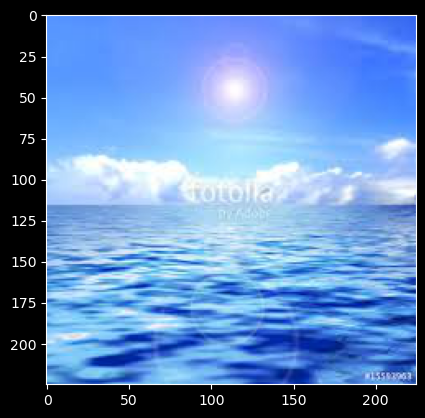

In [37]:
from matplotlib.pyplot import imshow
img  = Image.open(r"C:\Users\dell\Desktop\weather dataset\shine\shine33.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

rainy


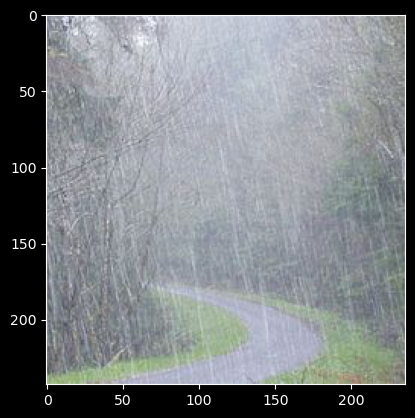

In [39]:
from matplotlib.pyplot import imshow
img  = Image.open(r"C:\Users\dell\Desktop\weather dataset\rainy\rain32.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))